

---



---



#**AIRBNB DATASET**

---



---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates


In [2]:
airbnb = pd.read_excel("airbnb_listings.xlsx")

### **Preprocessing**

In [3]:
print(airbnb.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30478 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30478 non-null  object        
 3   Neighbourhood               30478 non-null  object        
 4   Property Type               30475 non-null  object        
 5   Review Scores Rating (bin)  22155 non-null  float64       
 6   Room Type                   30478 non-null  object        
 7   Zipcode                     30344 non-null  float64       
 8   Beds                        30393 non-null  float64       
 9   Number of Records           30478 non-null  int64         
 10  Number Of Reviews           30478 non-null  int64         
 11  Price                       30478 non-null  int64     

In [4]:
#checking for null values

airbnb.isnull().sum()

Host Id                          0
Host Since                       3
Name                             0
Neighbourhood                    0
Property Type                    3
Review Scores Rating (bin)    8323
Room Type                        0
Zipcode                        134
Beds                            85
Number of Records                0
Number Of Reviews                0
Price                            0
Review Scores Rating          8323
dtype: int64

In [5]:
#### Filling missing values

airbnb = airbnb.dropna(subset =['Host Since'])

airbnb['Property Type'] = airbnb['Property Type'].fillna(airbnb['Property Type'].mode()[0])
airbnb['Zipcode'] = airbnb['Zipcode'].fillna(airbnb['Zipcode'].mode()[0])

airbnb['Beds'] = airbnb['Beds'].fillna(airbnb['Beds'].mean())

airbnb['Review Scores Rating'] = airbnb['Review Scores Rating'].fillna(airbnb['Review Scores Rating'].mean())
airbnb['Review Scores Rating (bin)'] = airbnb['Review Scores Rating (bin)'].fillna(airbnb['Review Scores Rating (bin)'].mean())

print(airbnb.isnull().sum())
print(airbnb.info())

Host Id                       0
Host Since                    0
Name                          0
Neighbourhood                 0
Property Type                 0
Review Scores Rating (bin)    0
Room Type                     0
Zipcode                       0
Beds                          0
Number of Records             0
Number Of Reviews             0
Price                         0
Review Scores Rating          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 30475 entries, 3 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Host Id                     30475 non-null  int64         
 1   Host Since                  30475 non-null  datetime64[ns]
 2   Name                        30475 non-null  object        
 3   Neighbourhood               30475 non-null  object        
 4   Property Type               30475 non-null  object        
 5   Review Scores 

In [6]:
# removing unnecessary columns 'Host Id', 'Zipcode ', 'Name'

airbnb = airbnb.drop(['Host Id', 'Zipcode', 'Name', 'Number of Records'], axis = 1)
airbnb.head()


,Host Since,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Beds,Number Of Reviews,Price,Review Scores Rating
3,2008-06-26,Manhattan,Apartment,90.738659,Entire home/apt,3.0,0,199,91.99323
4,2008-06-26,Manhattan,Apartment,95.000000,Private room,3.0,39,549,96.00000
5,2008-07-25,Brooklyn,Apartment,100.000000,Entire home/apt,1.0,4,149,100.00000
6,2008-08-12,Manhattan,Apartment,100.000000,Entire home/apt,1.0,9,250,100.00000
7,2008-08-15,Brooklyn,Apartment,90.000000,Private room,1.0,80,90,94.00000


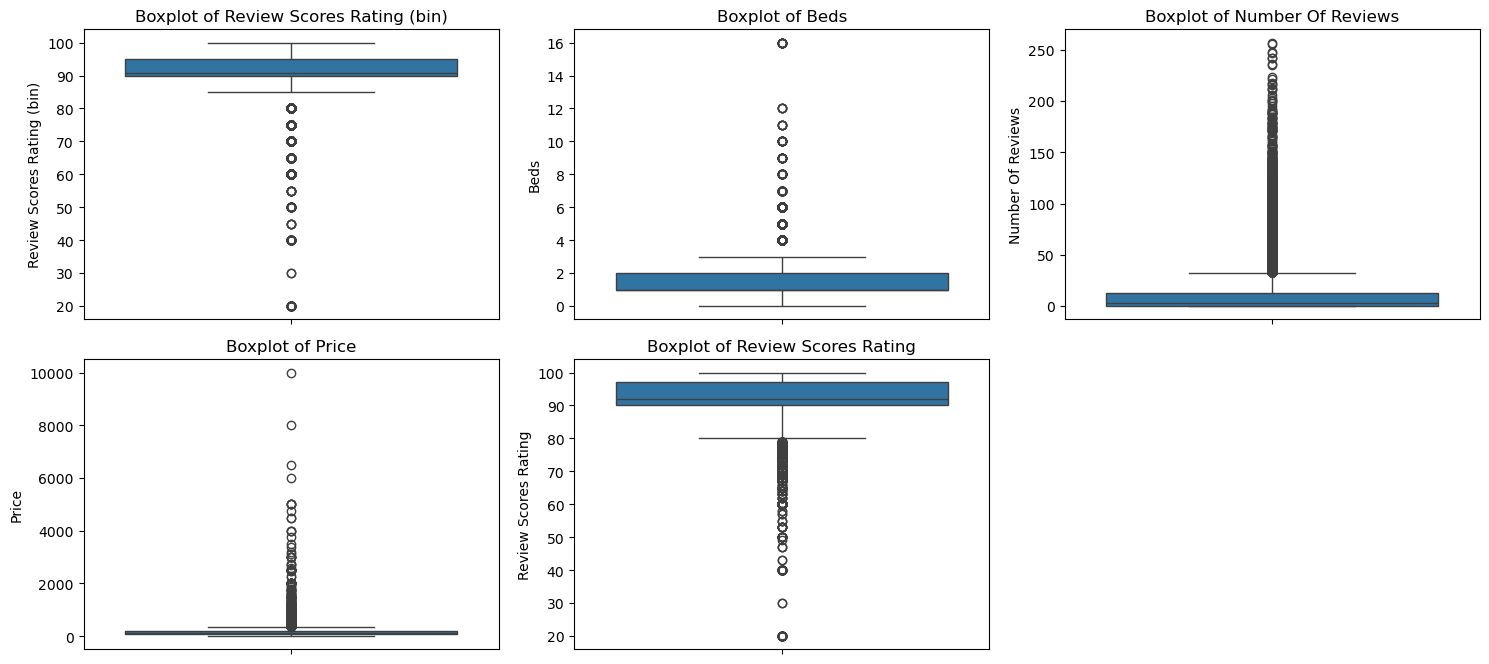

In [7]:
##check for outliers for the numeric columns

numeric_col = airbnb.select_dtypes(include = ['float64', 'int64']).columns
plt.figure(figsize = (15, 10))

for i, col in enumerate(numeric_col):
  plt.subplot(3, 3, i+1)
  sns.boxplot(airbnb[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [8]:
#removing outliers of numeric columns

airbnb_filtered = airbnb.copy()

for col in numeric_col:
  while True:
     Q1 = airbnb_filtered[col].quantile(0.25)
     Q3 = airbnb_filtered[col].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR
     outliers = airbnb_filtered[(airbnb_filtered[col] < lower_bound) | (airbnb_filtered[col] > upper_bound)]
     if len(outliers)==0:
       break
     airbnb_filtered = airbnb_filtered[(airbnb_filtered[col] < upper_bound)  & (airbnb_filtered[col] > lower_bound) ]
     print(f'Outliers removed from {col}')

Outliers removed from Review Scores Rating (bin)
Outliers removed from Beds
Outliers removed from Number Of Reviews
Outliers removed from Number Of Reviews
Outliers removed from Number Of Reviews
Outliers removed from Number Of Reviews
Outliers removed from Number Of Reviews
Outliers removed from Price
Outliers removed from Price
Outliers removed from Price


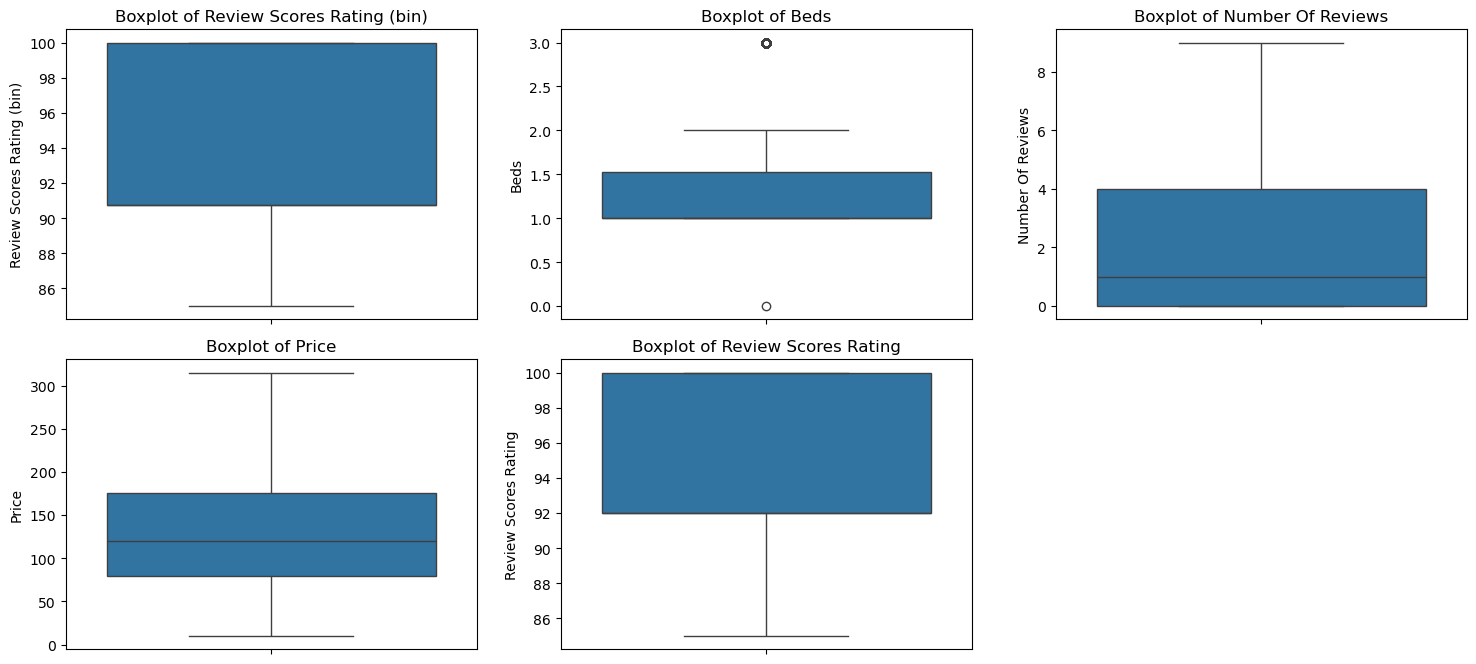

In [9]:
##check for outliers for the numeric columns after removing them


plt.figure(figsize = (15, 10))

for i, col in enumerate(numeric_col):
  plt.subplot(3, 3, i+1)
  sns.boxplot(airbnb_filtered[col])
  plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



---



---

## Univariate Analysis


---



---



 ### Airbnb prices are right-skewed, with most listings clustered at lower prices but a few extremely expensive properties.

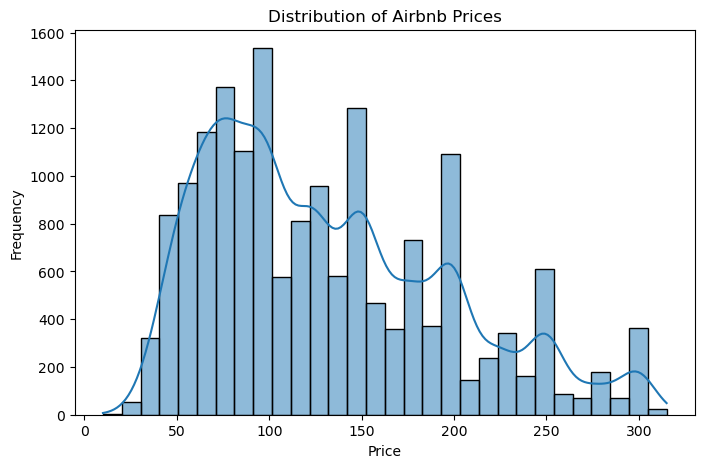

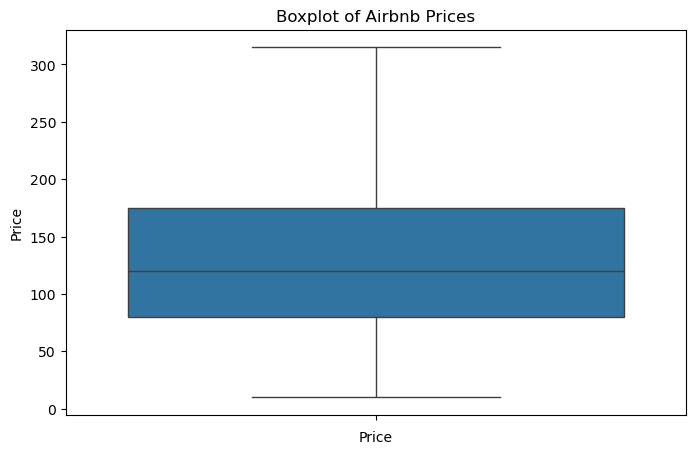

In [10]:
# Histogram Of Price Column

plt.figure(figsize = (8, 5))
sns.histplot(airbnb_filtered['Price'], bins = 30, kde = True)
plt.title('Distribution of Airbnb Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

#Boxplot Of Price

plt.figure(figsize = (8, 5))
sns.boxplot(airbnb_filtered['Price'])
plt.title('Boxplot of Airbnb Prices')
plt.xlabel('Price')
plt.show()

## Number of reviews follows a long-tail distribution, indicating few listings dominate the majority of reviews.

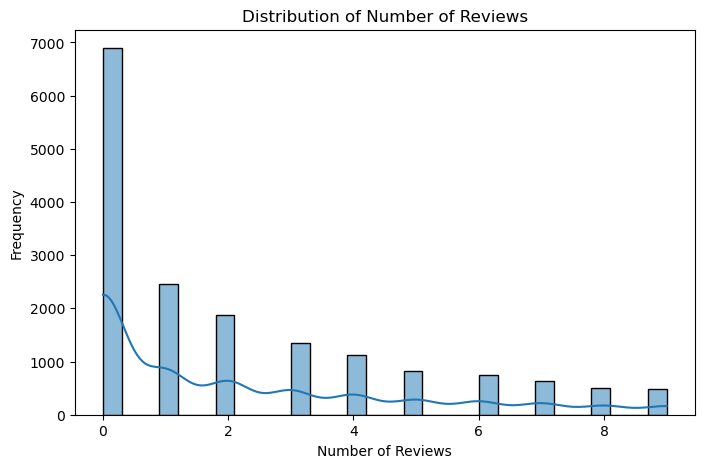

In [11]:
#Make a kde of number of reviews

plt.figure(figsize = (8, 5))
sns.histplot(airbnb_filtered['Number Of Reviews'], bins = 30, kde = True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()



---



---
## Bivariate Analysis


---



---




### **Room type significantly affects price (e.g., entire homes are more expensive than private rooms).**

C:\Users\User\AppData\Local\Temp\ipykernel_15184\1294829629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = airbnb['Room Type'], y = airbnb['Price'], palette= 'viridis')


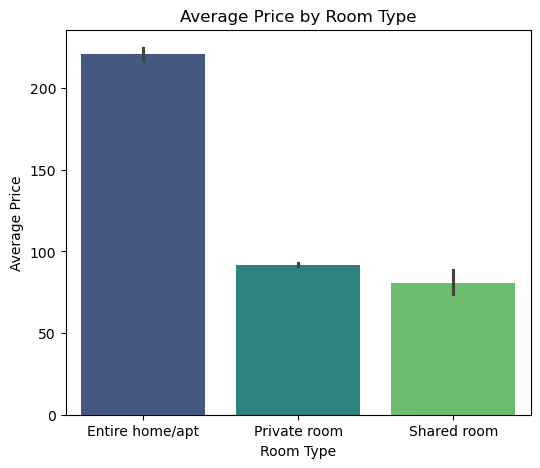

In [12]:
plt.figure(figsize = (6, 5))
sns.barplot(x = airbnb['Room Type'], y = airbnb['Price'], palette= 'viridis')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

## Price Differ By Property Type

C:\Users\User\AppData\Local\Temp\ipykernel_15184\2286702127.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = airbnb['Property Type'], y = airbnb['Price'], palette = 'viridis')


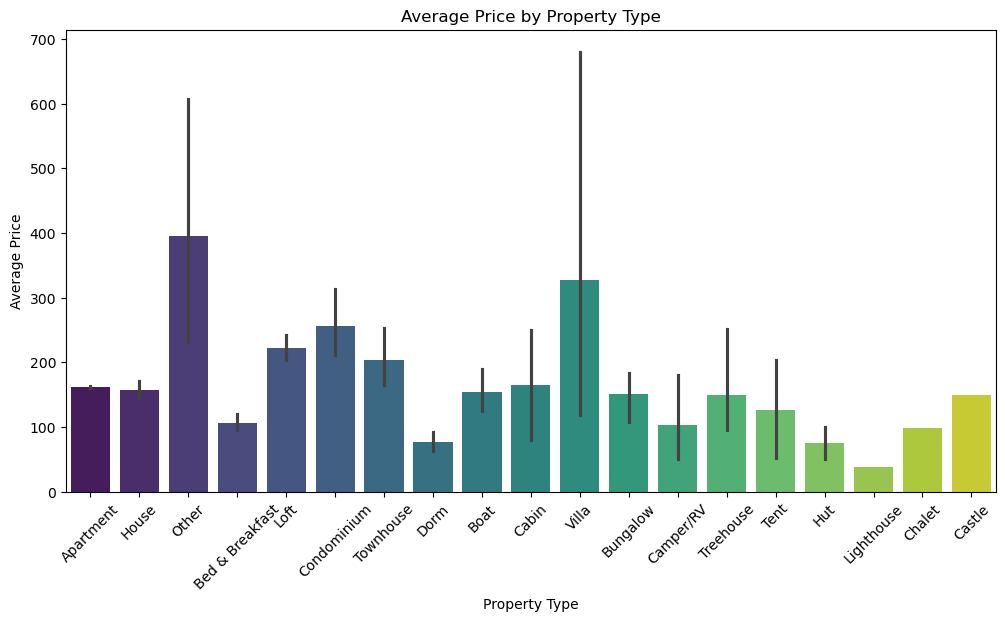

In [13]:
airbnb['price_log'] = np.log(airbnb['Price'])

plt.figure(figsize = (12, 6))
sns.barplot(x = airbnb['Property Type'], y = airbnb['Price'], palette = 'viridis')
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation = 45)
plt.show()

##  Neighbourhood group influences price due to location-based demand (e.g., Manhattan vs Bronx).

C:\Users\User\AppData\Local\Temp\ipykernel_15184\423386323.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = airbnb['Neighbourhood '], y = airbnb['Price'], palette = 'viridis')


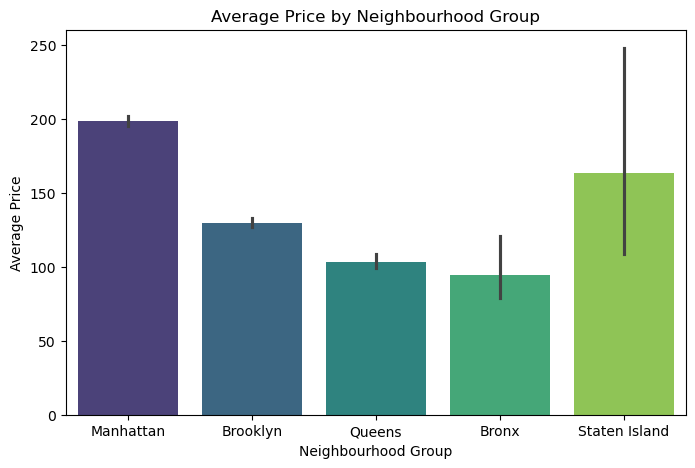

In [14]:
# Make a visalization that shows how neigbour hood effects the price

plt.figure(figsize = (8, 5))
sns.barplot(x = airbnb['Neighbourhood '], y = airbnb['Price'], palette = 'viridis')
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

## Higher review ratings are associated with higher prices.

C:\Users\User\AppData\Local\Temp\ipykernel_15184\3371537047.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = airbnb['Review Scores Rating'], y = airbnb['Price'], palette = 'viridis')


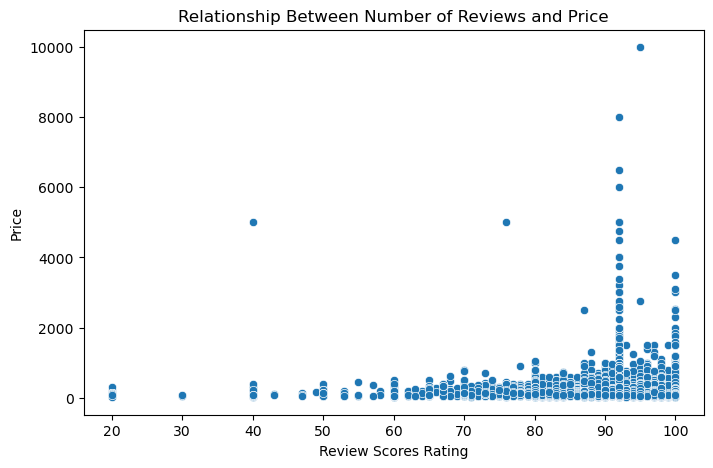

In [15]:
#Relationship Between Number of reviews and price

plt.figure(figsize = (8, 5))
sns.scatterplot(x = airbnb['Review Scores Rating'], y = airbnb['Price'], palette = 'viridis')
plt.title('Relationship Between Number of Reviews and Price')
plt.show()

---



---

## Multivariate Analysis


---


---





## Property Type, Room Type, jointly influence Price

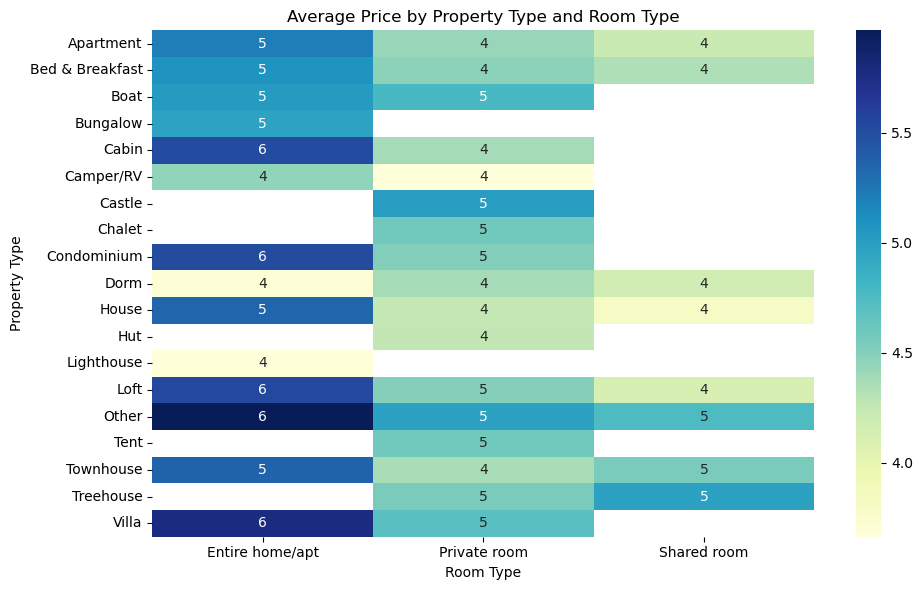

In [16]:

#Heat Map



# Create pivot table for average prices
pivot_price = airbnb.pivot_table( values='price_log', index='Property Type', columns='Room Type', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_price, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Average Price by Property Type and Room Type')
plt.ylabel('Property Type')
plt.xlabel('Room Type')
plt.tight_layout()
plt.show()


### **Room type and neighbourhood together influence the average price of Airbnb listings — certain room types are priced higher in specific neighbourhoods compared to others.**

C:\Users\User\AppData\Local\Temp\ipykernel_15184\3494943658.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Neighbourhood ',y='Price',hue='Room Type',data=airbnb, estimator=np.mean,ci=None, palette='viridis')


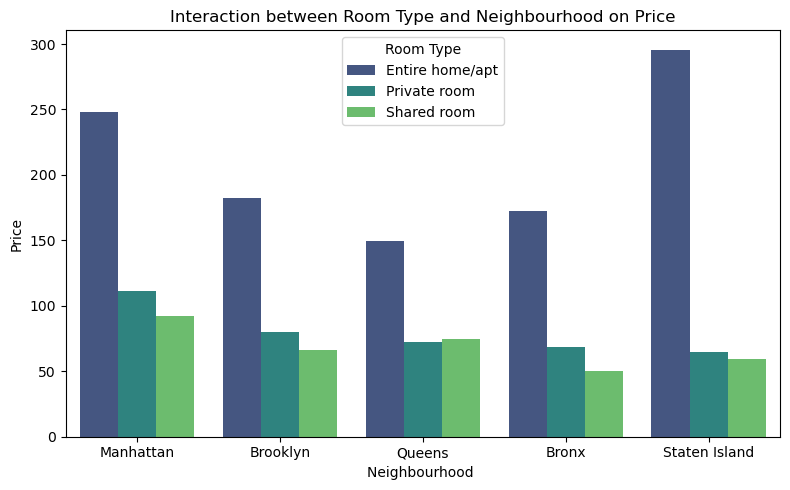

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x='Neighbourhood ',y='Price',hue='Room Type',data=airbnb, estimator=np.mean,ci=None, palette='viridis')
plt.title('Interaction between Room Type and Neighbourhood on Price')
plt.tight_layout()
plt.show()


### There are meaningful relationships between Airbnb listing characteristics — such as the number of beds, number of reviews, and review scores — and the log-transformed price. In particular, listings with more beds, higher review scores, and more reviews are expected to have higher prices.

<Figure size 800x500 with 0 Axes>

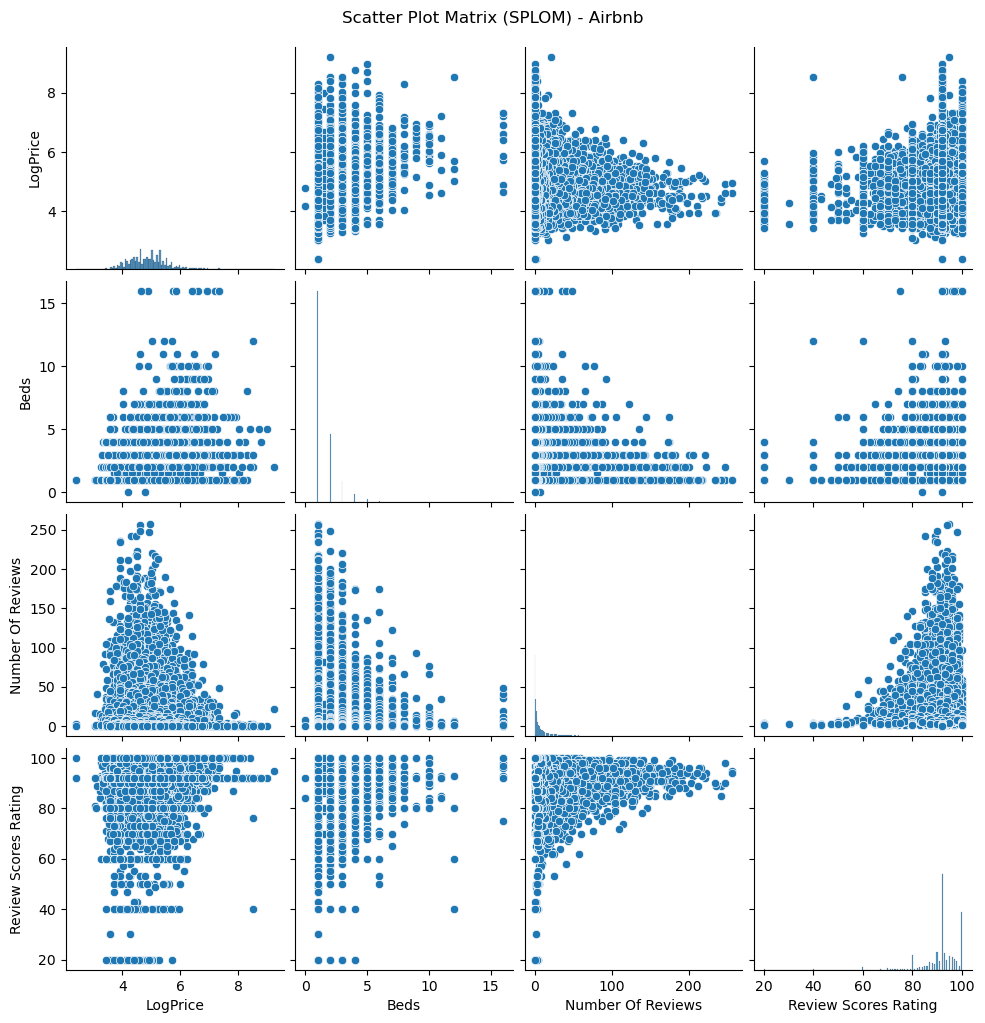

In [18]:


airbnb['LogPrice'] = np.log1p(airbnb['Price'])

numeric_cols = ['LogPrice', 'Beds', 'Number Of Reviews', 'Review Scores Rating']

# Pairplot (SPLOM)
plt.figure(figsize=(8, 5))
sns.pairplot(airbnb[numeric_cols].dropna())
plt.suptitle('Scatter Plot Matrix (SPLOM) - Airbnb', y=1.02)
plt.show()


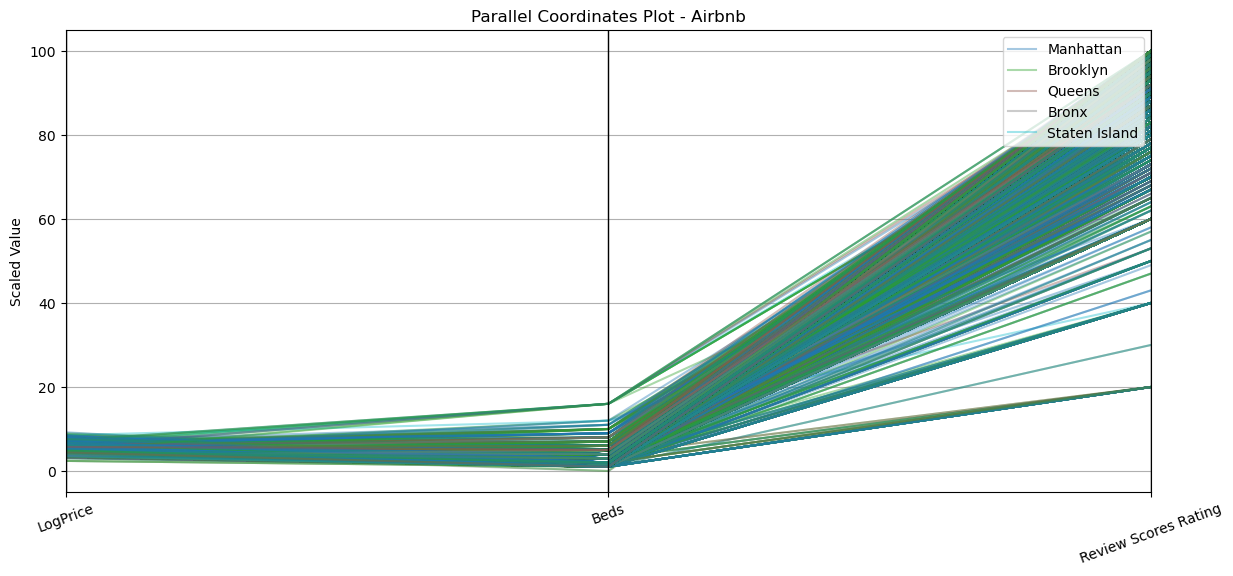

In [19]:

subset = airbnb[['LogPrice', 'Beds','Review Scores Rating', 'Neighbourhood ']].dropna()



plt.figure(figsize=(14,6))
parallel_coordinates(subset, class_column='Neighbourhood ', colormap='tab10', alpha=0.4)
plt.title('Parallel Coordinates Plot - Airbnb')
plt.ylabel('Scaled Value')
plt.xticks(rotation=20)
plt.show()


## Correlation HeatMap

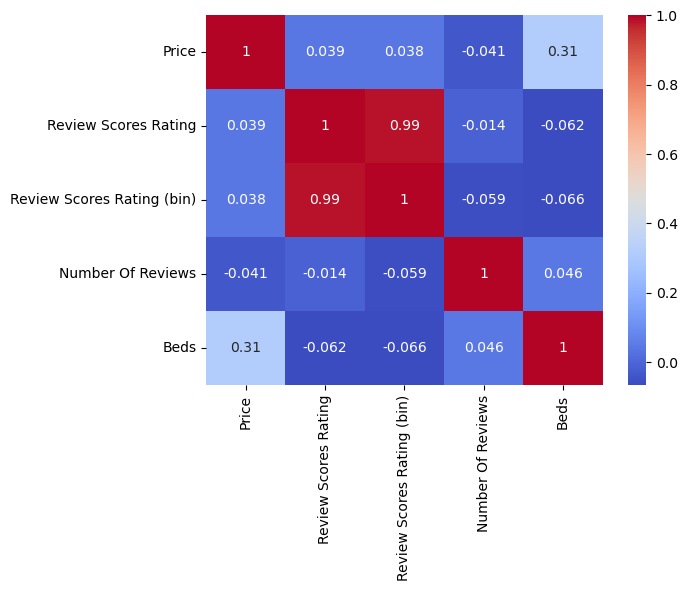

In [20]:
# correlation matrix

numeric_col = ['Price', 'Review Scores Rating', 'Review Scores Rating (bin)', 'Number Of Reviews', 'Beds']
corr = airbnb[numeric_col].corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()